SUPPORT VECTOR MACHINE      

In [78]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
data = pd.read_csv('/Users/areebafarooqui/Downloads/archive/Tweets.csv')

**DATA EXPLORATION**

In [81]:
data.shape

(14640, 15)

In [82]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [83]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [84]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [85]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [86]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [87]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

In [88]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

In [89]:
data['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [90]:
data['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [91]:
#checking uniques values in tweet_created columns
data['tweet_created'].nunique()

9

In [92]:
numberoftweets = data.groupby('tweet_created').size()

In [93]:
numberoftweets.dtype

dtype('int64')

In [94]:
numberoftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

In [95]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [96]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

airline_sentiment_gold, negativereason_gold have more than 99% missing data And tweet_coord have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [97]:
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [98]:
freq = data.groupby('negativereason').size()

In [99]:
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

In [100]:
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In recent times, air travel experiences seem to be less enjoyable for passengers. It's crucial to determine which airlines are most and least satisfying for their customers, so we'll be examining the percentage of negative reviews for each airline.

In [101]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

In [102]:
date = data.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
               United          negative               2
2015-02-17     Delta           negative             108
                               positive              69
               Southwest       negative             213
                                                   ... 
2015-02-24     US Airways      positive              16
               United          negative             142
                               positive              25
               Virgin America  negative              10
                               positive              13
Length: 92, dtype: int64

**DATA PREPROCESSING**

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


In [104]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [105]:
nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/areebafarooqui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
x = data.clean_tweet
y = data.airline_sentiment

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


In [108]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [109]:

x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [110]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

**SVM**

In [111]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [112]:
accuracy_score(y_test,pred)

0.9081774081774082

In [113]:
cm = confusion_matrix(y_test, pred)
cm

array([[2194,  129],
       [ 136,  427]])

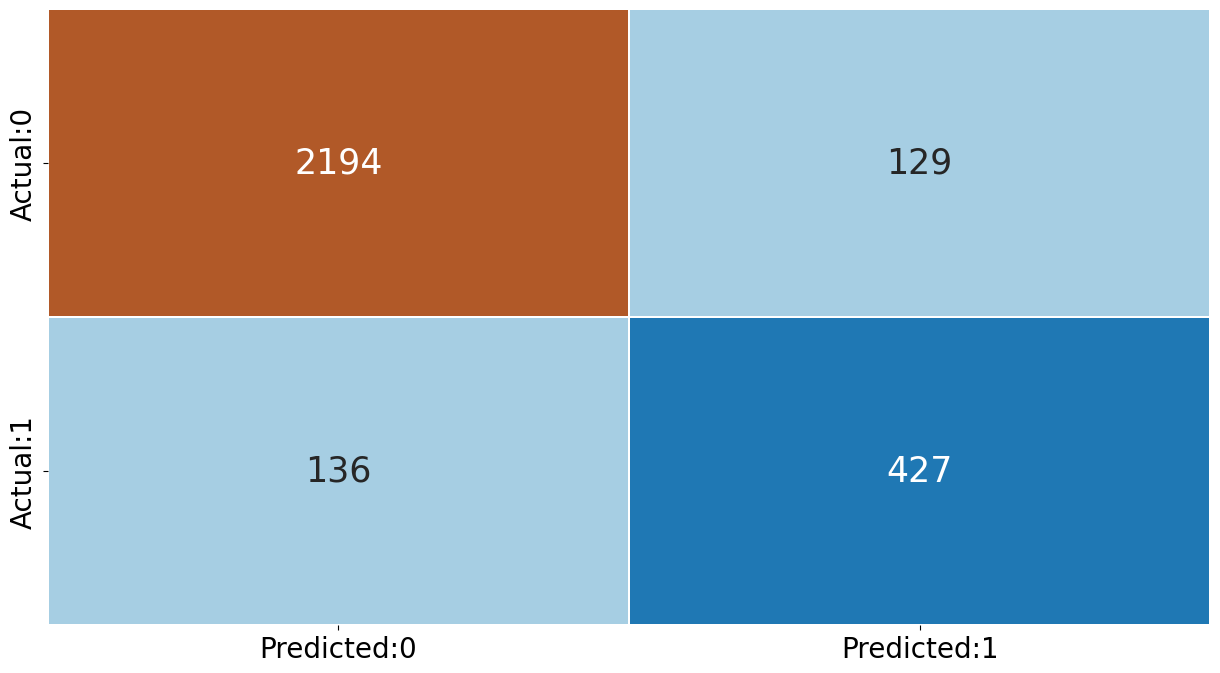

In [114]:
plt.rcParams['figure.figsize'] = [15,8]
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [115]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.94      0.94      0.94      2323
    positive       0.77      0.76      0.76       563

    accuracy                           0.91      2886
   macro avg       0.85      0.85      0.85      2886
weighted avg       0.91      0.91      0.91      2886



**DECISION TREES**

In [116]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import re
import os
import nltk
from sklearn.svm import SVC
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [117]:
A = data.clean_tweet
y = data.airline_sentiment

In [118]:
tfid = TfidfVectorizer()
A_Clean =  tfid.fit_transform(A)

In [119]:
# Using Smote to to balance the data if imbalanced
imbalance = SMOTE()
x_sm,y_sm = imbalance.fit_resample(A_Clean,y)

In [120]:
A_train , A_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

In [121]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(A_train,y_train)
decision_tree_pred=decision_tree.predict(A_test)
accuracy_score(decision_tree_pred,y_test)

0.908258879930268

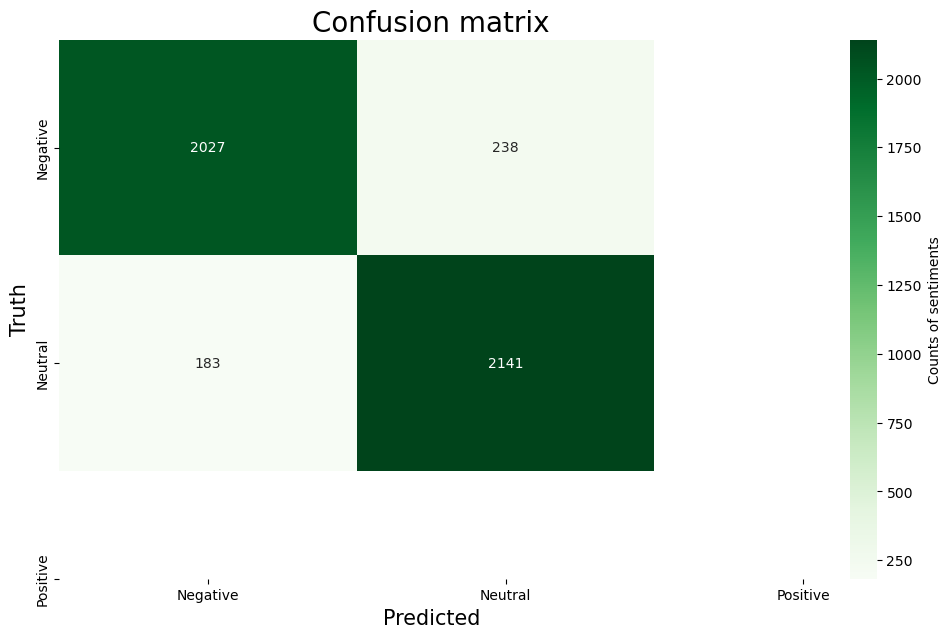

In [122]:
cm_dsn = confusion_matrix(y_test,decision_tree_pred)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sb.heatmap(cm_dsn, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Counts of sentiments'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

In [123]:
print(classification_report(y_test,decision_tree_pred))

              precision    recall  f1-score   support

    negative       0.92      0.89      0.91      2265
    positive       0.90      0.92      0.91      2324

    accuracy                           0.91      4589
   macro avg       0.91      0.91      0.91      4589
weighted avg       0.91      0.91      0.91      4589



**RANDOM FOREST**

In [124]:
from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn.ensemble import RandomForestRegressor  # For regression tasks

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [128]:
B = data.clean_tweet
C = data.airline_sentiment

In [129]:
X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)

In [130]:
vectorizer = CountVectorizer(max_features=5000)

In [131]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [132]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [133]:
y_pred = rf_classifier.predict(X_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.89172802078822
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.94      0.93      1862
    positive       0.74      0.69      0.71       447

    accuracy                           0.89      2309
   macro avg       0.83      0.81      0.82      2309
weighted avg       0.89      0.89      0.89      2309



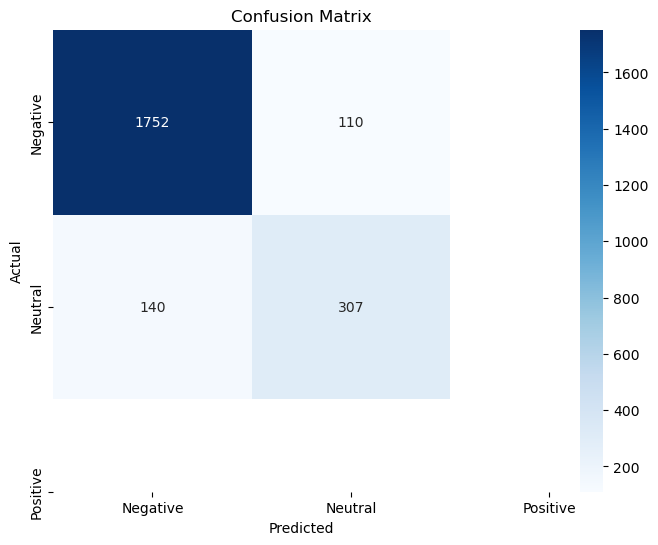

In [137]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**STOCHASTIC GRADIENT**

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [140]:
X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)

In [141]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [142]:
# Initialize and train the SGD Classifier
sgd_classifier = SGDClassifier(loss='log', random_state=42)  # 'log' for logistic regression (binary classification)
sgd_classifier.fit(X_train, y_train)

/Users/areebafarooqui/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=42)

In [143]:
y_pred = sgd_classifier.predict(X_test)

In [144]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9146816803811174
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.96      0.95      1862
    positive       0.83      0.71      0.76       447

    accuracy                           0.91      2309
   macro avg       0.88      0.84      0.86      2309
weighted avg       0.91      0.91      0.91      2309



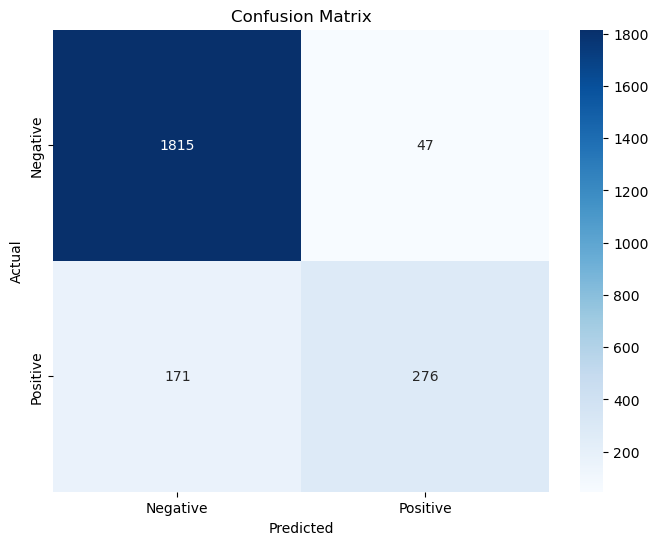

In [155]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**ENSEMBLE** 

In [148]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [149]:

X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)

In [150]:
vectorizer = CountVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [151]:
#Random Forest and SGD

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
sgd_classifier = SGDClassifier(loss='log', random_state=42)


In [152]:

#VotingClassifier is an ensemble learning method that combines the predictions of multiple base classifiers to make a final decision.
voting_classifier = VotingClassifier(estimators=[
    ('RandomForest', random_forest_classifier),
    ('SGD', sgd_classifier)
], voting='hard')

In [153]:
voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

/Users/areebafarooqui/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 0.9055868341273279
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.97      0.94      1862
    positive       0.85      0.62      0.72       447

    accuracy                           0.91      2309
   macro avg       0.88      0.80      0.83      2309
weighted avg       0.90      0.91      0.90      2309



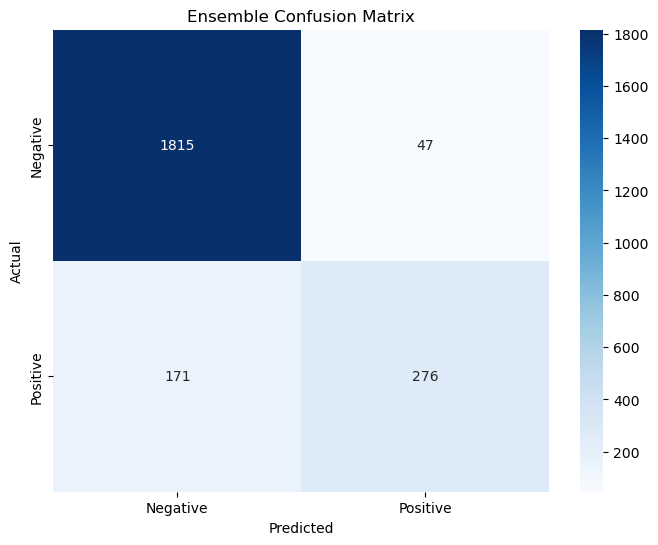

In [156]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Confusion Matrix')
plt.show()